In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('Yhills_June_2-main/titanic-training-data.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

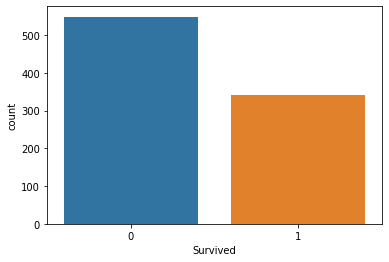

In [7]:
sns.countplot(x='Survived',data=data)

In [8]:
pd.crosstab(data['Survived'],data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

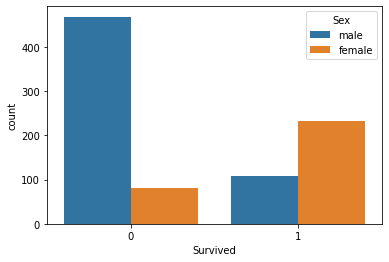

In [9]:
sns.countplot(x='Survived',hue='Sex',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

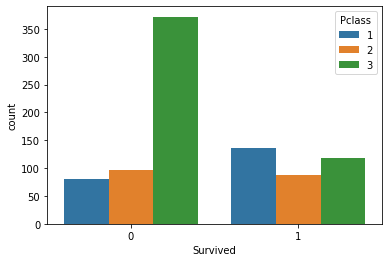

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=data)

In [12]:
data['Survived'].sum()

342

In [13]:
pd.crosstab(data['Survived'],data['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [14]:
pd.crosstab(data['Survived'],data['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

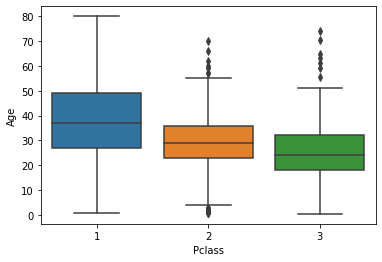

In [17]:
sns.boxplot(y='Age',x='Pclass',data=data)

<AxesSubplot:xlabel='Age', ylabel='count'>

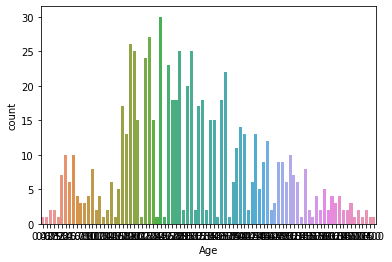

In [18]:
sns.countplot(x='Age',data=data)

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

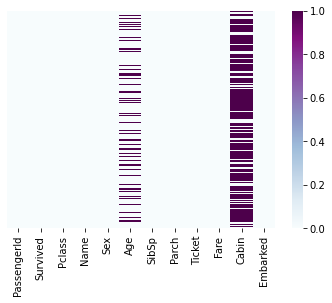

In [33]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="BuPu")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
data.head(5
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.drop(['PassengerId'],axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [72]:
x=data.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

In [58]:
x.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [59]:
x.shape

(891, 7)

In [45]:
data.shape

(891, 12)

In [60]:
x.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [77]:
x=pd.get_dummies(x,columns=['Sex'])

In [78]:
x.head(2)

,Survived,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,0,0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0,0,1,0


In [63]:
x.shape

(891, 96)

In [79]:
x.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
dtype: object

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 101 entries, PassengerId to Embarked_S
dtypes: float64(1), int64(5), object(4), uint8(91)
memory usage: 148.9+ KB


In [55]:
x.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_0.42,Age_0.67,Age_0.75,Age_0.83,...,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.001122,0.001122,0.002245,0.002245,...,0.003367,0.001122,0.002245,0.001122,0.002245,0.001122,0.001122,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.033501,0.033501,0.047351,0.047351,...,0.057961,0.033501,0.047351,0.033501,0.047351,0.033501,0.033501,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
x=pd.get_dummies(x,columns=['Sex'])

In [67]:
x.head(5)

,Survived,Pclass,SibSp,Parch,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,...,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [80]:
x.isnull().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_female      0
Sex_male        0
dtype: int64

In [69]:
x


,Survived,Pclass,SibSp,Parch,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,...,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
887,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
888,0,3,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
889,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [70]:
x.dtypes

Survived      int64
Pclass        int64
SibSp         int64
Parch         int64
Age_0.42      uint8
              ...  
Embarked_C    uint8
Embarked_Q    uint8
Embarked_S    uint8
Sex_female    uint8
Sex_male      uint8
Length: 97, dtype: object

In [83]:
x.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
dtype: int64

In [82]:
x.dropna(inplace=True)

In [84]:
x.head(2)

,Survived,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,0,0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0,0,1,0


KeyError: "['Sex' 'Embarked' 'PassengerId' 'Name' 'Ticket' 'Pclass' 'Fare'] not found in axis"

In [89]:
x1=x.drop(['Survived'],axis=1)
y1=x['Survived']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=1)

In [92]:
reg_model=LogisticRegression()
reg_model.fit(x_train,y_train)

c:\Users\ayyar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [93]:
reg_model.score(x_train,y_train)

0.7955911823647295